In [4]:
# 1. 필요한 라이브러리 설치 (한 번만 실행)
# !pip install folium selenium pillow

import folium

# 경북대학교 중심 좌표
knu_center = [35.8885, 128.6108]

# 지도 객체 생성
m = folium.Map(location=knu_center, zoom_start=16)

# 주요 건물 마커 표시
locations = [
    ([35.8893, 128.6104], "도서관"),
    ([35.8882, 128.6125], "IT대학"),
    ([35.8875, 128.6095], "학생회관"),
    ([35.8868, 128.6082], "공대 10호관"),
    ([35.8891, 128.6135], "글로벌플라자")
]

for loc, name in locations:
    folium.Marker(loc, tooltip=name, icon=folium.Icon(color='blue')).add_to(m)

# 지도 HTML로 저장
m.save("knu_map.html")


In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from PIL import Image
import time

# Chrome 드라이버 설정 (Chrome 설치 필요)
options = Options()
options.add_argument("--headless")
options.add_argument("--window-size=1200,900")
driver = webdriver.Chrome(options=options)

# 로컬 HTML 파일 열기
driver.get("file:///your/path/to/knu_map.html")  # ← 이 경로 수정 필요!

time.sleep(2)  # 지도 로딩 대기

# 전체 페이지 스크린샷
driver.save_screenshot("knu_map.png")
driver.quit()

# 확인용 자르기 또는 보기
img = Image.open("knu_map.png")
img.show()


C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\518598664.py:33: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.savefig("knu_zone_map.png", dpi=300, bbox_inches='tight')
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\518598664.py:33: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from font(s) DejaVu Sans.
  plt.savefig("knu_zone_map.png", dpi=300, bbox_inches='tight')
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\518598664.py:33: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.savefig("knu_zone_map.png", dpi=300, bbox_inches='tight')
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\518598664.py:33: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.savefig("knu_zone_map.png", dpi=300, bbox_inches='tight')
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\518598664.py:33: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from fo

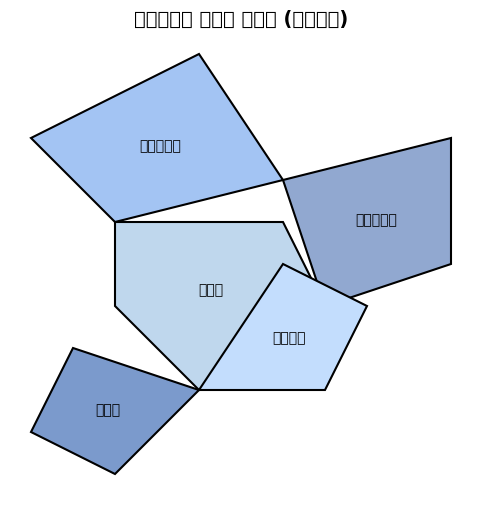

In [10]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import matplotlib.patches as patches

# 캠퍼스 구역 5개를 임의로 단순화한 폴리곤(좌표는 예시)
zones = {
    '인문사회대': Polygon([(0, 4), (2, 5), (3, 3.5), (1, 3)]),
    '자연과학대': Polygon([(3, 3.5), (5, 4), (5, 2.5), (3.5, 2)]),
    '공과대': Polygon([(1, 3), (3, 3), (3.5, 2), (2, 1), (1, 2)]),
    '기숙사': Polygon([(0.5, 1.5), (2, 1), (1, 0), (0, 0.5)]),
    '행정본부': Polygon([(3, 2.5), (4, 2), (3.5, 1), (2, 1)])
}

colors = ['#A3C4F3', '#91A8D0', '#BFD7ED', '#7B9ACC', '#C3DDFD']

fig, ax = plt.subplots(figsize=(8, 6))

for (zone, poly), color in zip(zones.items(), colors):
    x, y = poly.exterior.xy
    ax.fill(x, y, color=color, label=zone, edgecolor='black', linewidth=1.5)

# 레이블 텍스트
for zone, poly in zones.items():
    x, y = poly.centroid.x, poly.centroid.y
    ax.text(x, y, zone, ha='center', va='center', fontsize=10, weight='bold', color='black')

# 스타일 설정
ax.set_title('경북대학교 캠퍼스 구역도 (디자인용)', fontsize=14, weight='bold')
ax.set_xticks([]); ax.set_yticks([]); ax.set_aspect('equal')
ax.axis('off')

# 이미지 저장 (HTML 저장 없이!)
plt.savefig("knu_zone_map.png", dpi=300, bbox_inches='tight')
plt.show()


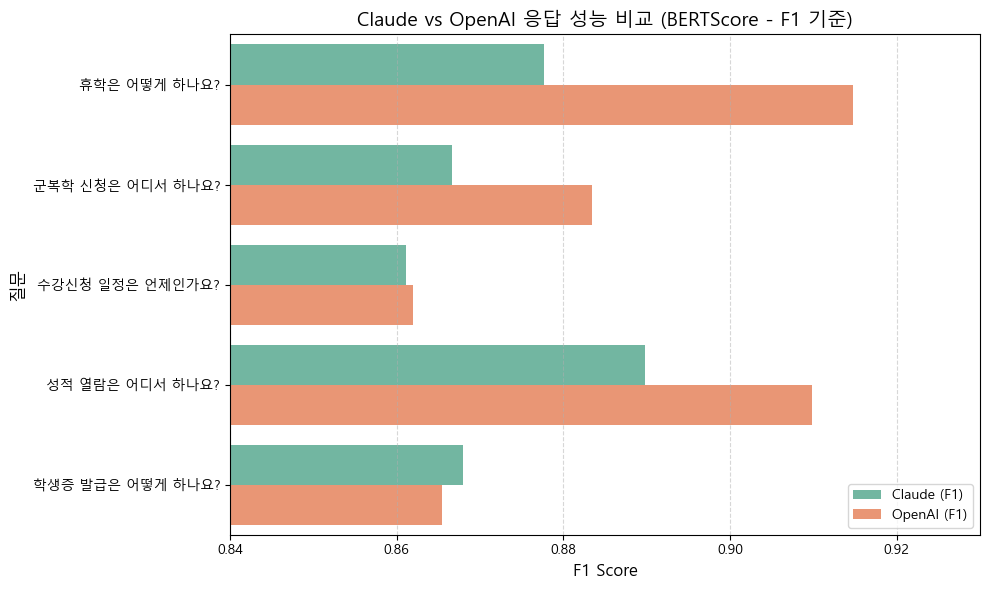

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정: Windows용
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정의
claude_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "Claude (F1)": [0.8777, 0.8667, 0.8611, 0.8898, 0.8680]
})

openai_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "OpenAI (F1)": [0.9148, 0.8834, 0.8620, 0.9099, 0.8654]
})

# 두 모델의 결과 병합
merged = pd.merge(claude_scores, openai_scores, on="질문")

# melt를 이용한 long format 변환 (시각화에 적합)
df_long = merged.melt(id_vars="질문", var_name="모델", value_name="F1 Score")

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x="F1 Score", y="질문", hue="모델", palette="Set2")
plt.title("Claude vs OpenAI 응답 성능 비교 (BERTScore - F1 기준)", fontsize=14)
plt.xlabel("F1 Score", fontsize=12)
plt.ylabel("질문", fontsize=12)
plt.xlim(0.84, 0.93)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


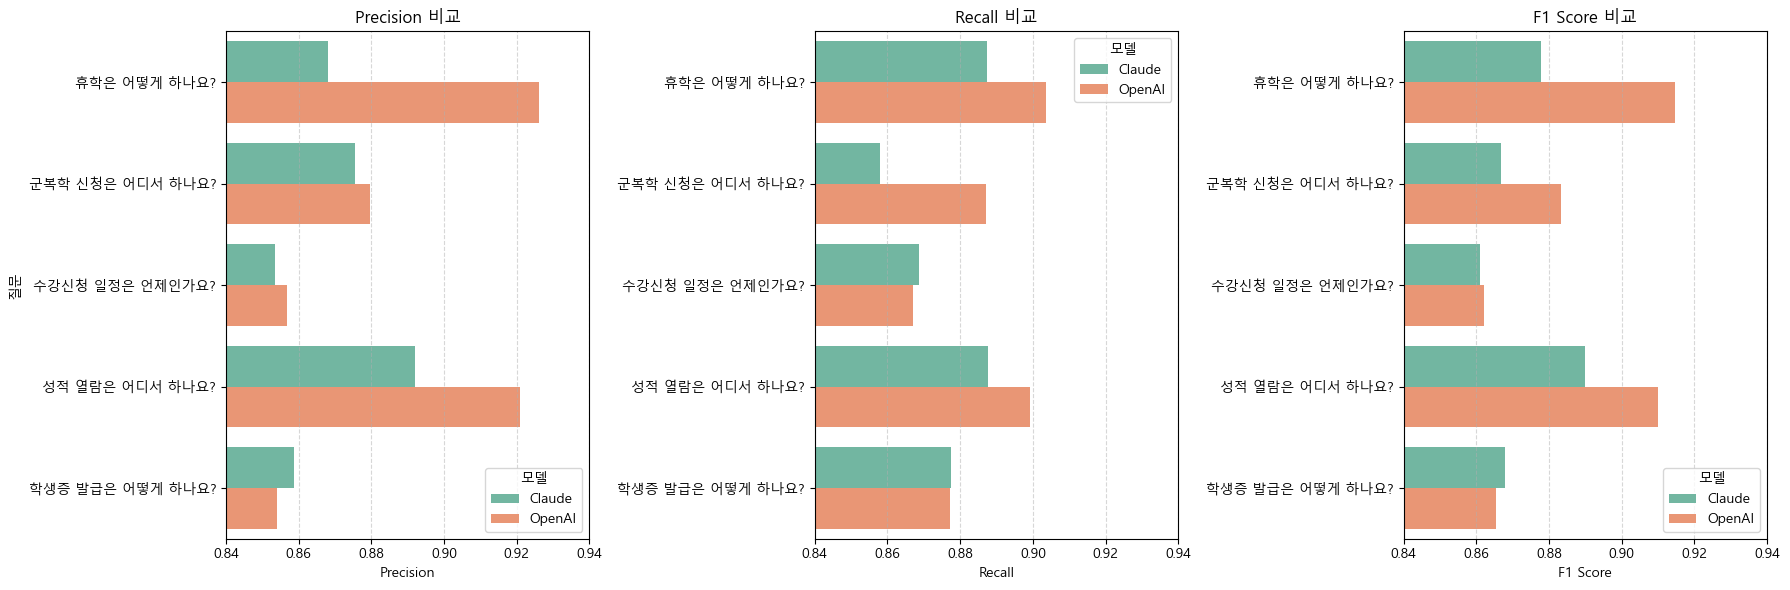

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['Precision', 'Recall', 'F1 Score']
claude_vals = [[0.8681, 0.8875, 0.8777],
               [0.8756, 0.8580, 0.8667],
               [0.8536, 0.8688, 0.8611],
               [0.8921, 0.8876, 0.8898],
               [0.8587, 0.8775, 0.8680]]
openai_vals = [[0.9262, 0.9037, 0.9148],
               [0.8797, 0.8871, 0.8834],
               [0.8569, 0.8671, 0.8620],
               [0.9208, 0.8992, 0.9099],
               [0.8540, 0.8771, 0.8654]]

questions = [
    "휴학은 어떻게 하나요?",
    "군복학 신청은 어디서 하나요?",
    "수강신청 일정은 언제인가요?",
    "성적 열람은 어디서 하나요?",
    "학생증 발급은 어떻게 하나요?"
]

for i, metric in enumerate(metrics):
    df = pd.DataFrame({
        "질문": questions,
        "Claude": [v[i] for v in claude_vals],
        "OpenAI": [v[i] for v in openai_vals]
    }).melt(id_vars="질문", var_name="모델", value_name=metric)
    
    sns.barplot(data=df, x=metric, y="질문", hue="모델", ax=axes[i], palette="Set2")
    axes[i].set_title(f"{metric} 비교")
    axes[i].set_xlim(0.84, 0.94)
    axes[i].grid(axis='x', linestyle='--', alpha=0.5)
    if i != 0:
        axes[i].set_ylabel("")
    else:
        axes[i].set_ylabel("질문")

plt.tight_layout()
plt.show()


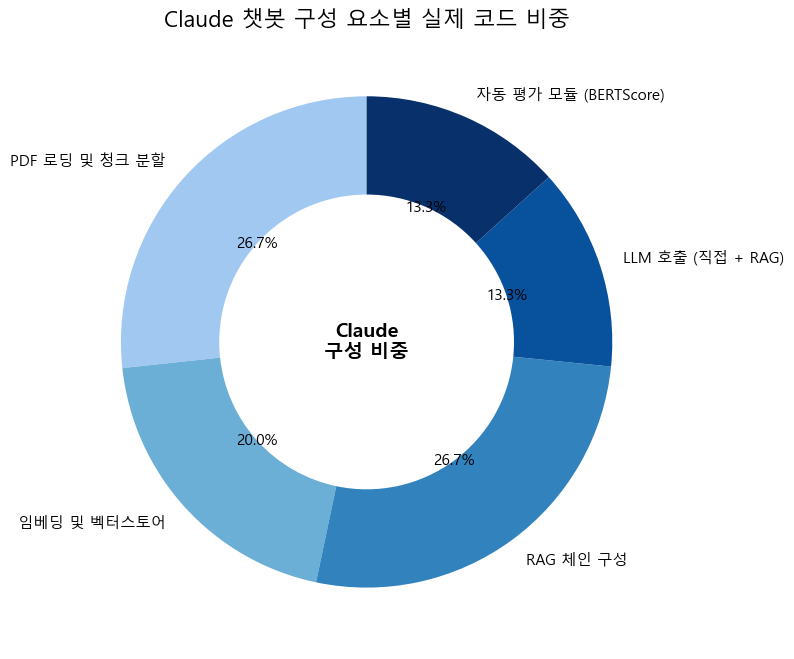

In [14]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 사용자 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 구성요소와 라인 비중 (직전 분석 결과 그대로 입력)
labels = [
    "PDF 로딩 및 청크 분할",
    "임베딩 및 벡터스토어",
    "RAG 체인 구성",
    "LLM 호출 (직접 + RAG)",
    "자동 평가 모듈 (BERTScore)"
]
sizes = [26.7, 20.0, 26.7, 13.3, 13.3]
colors = ['#A0C8F0', '#6BAED6', '#3182BD', '#08519C', '#08306B']

# 도넛형 파이 차트
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%',
    startangle=90, wedgeprops=dict(width=0.4), textprops={'fontsize': 11}
)

plt.text(0, 0, "Claude\n구성 비중", ha='center', va='center', fontsize=14, weight='bold')
plt.title("Claude 챗봇 구성 요소별 실제 코드 비중", fontsize=16)
plt.tight_layout()
plt.show()


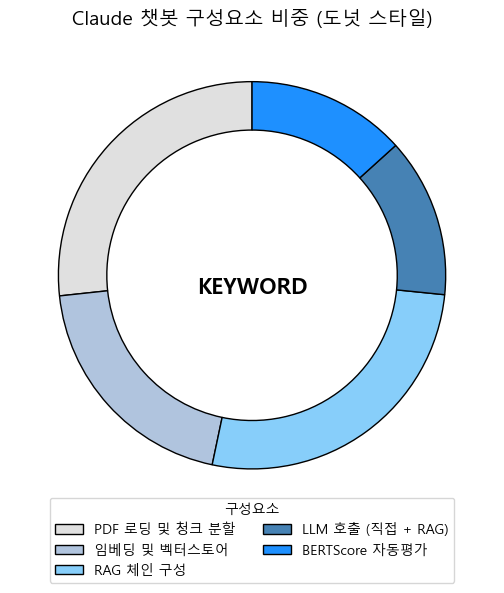

In [16]:
import matplotlib.pyplot as plt

# 한글 폰트 (윈도우는 'Malgun Gothic', macOS는 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'  # macOS는 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 구성요소 이름과 비중 (%)
labels = [
    "PDF 로딩 및 청크 분할",
    "임베딩 및 벡터스토어",
    "RAG 체인 구성",
    "LLM 호출 (직접 + RAG)",
    "BERTScore 자동평가"
]
sizes = [26.7, 20.0, 26.7, 13.3, 13.3]  # test_claude.py 분석 결과
colors = ['#e0e0e0', '#b0c4de', '#87cefa', '#4682b4', '#1e90ff']  # 밝은 회색 → 진한 파랑

# 도넛형 파이 차트 그리기
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(
    sizes,
    labels=None,  # 중심에 텍스트 따로 넣기 위해 labels 생략
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.25, edgecolor='black')
)

# 중앙 키워드 텍스트 (아이콘 느낌)
ax.text(0, 0, "\nKEYWORD", ha='center', va='center', fontsize=16, weight='bold')

# 범례 아래에 배치
plt.legend(
    wedges,
    labels,
    title="구성요소",
    loc='lower center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    fontsize=10
)

plt.title("Claude 챗봇 구성요소 비중 (도넛 스타일)", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3679983967.py:58: UserWarning: Glyph 55092 (\N{HANGUL SYLLABLE HYU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3679983967.py:58: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3679983967.py:58: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3679983967.py:58: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3679983967.py:58: UserWarning: Glyph 46523 (\N{HANGUL SYLLABLE DDEOH}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3679983967.py:58: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) Arial.
  plt.tight_l

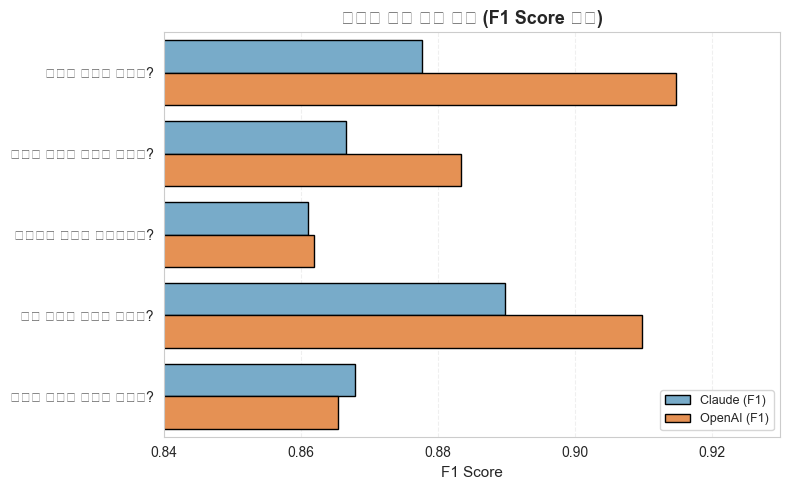

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['font.family'] = 'Malgun Gothic'  # macOS는 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정의
claude_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "Claude (F1)": [0.8777, 0.8667, 0.8611, 0.8898, 0.8680]
})

openai_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "OpenAI (F1)": [0.9148, 0.8834, 0.8620, 0.9099, 0.8654]
})

# 병합 및 long-format 변환
merged = pd.merge(claude_scores, openai_scores, on="질문")
df_long = merged.melt(id_vars="질문", var_name="모델", value_name="F1 Score")

# 스타일 지정
sns.set_style("whitegrid")

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_long,
    x="F1 Score",
    y="질문",
    hue="모델",
    palette=["#6baed6", "#fd8d3c"],
    edgecolor="black"
)

# 제목 및 꾸미기
plt.title("모델별 응답 품질 비교 (F1 Score 기준)", fontsize=13, weight='bold')
plt.xlabel("F1 Score", fontsize=11)
plt.ylabel("")  # y축 제목 제거
plt.xlim(0.84, 0.93)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title="", loc='lower right', fontsize=9)
plt.tight_layout()

# 저장 (투명한 배경, 고해상도)
plt.savefig("F1_score_comparison_ppt_style.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\2117673008.py:60: UserWarning: Glyph 55092 (\N{HANGUL SYLLABLE HYU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\2117673008.py:60: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\2117673008.py:60: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\2117673008.py:60: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\2117673008.py:60: UserWarning: Glyph 46523 (\N{HANGUL SYLLABLE DDEOH}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\2117673008.py:60: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) Arial.
  plt.tight_l

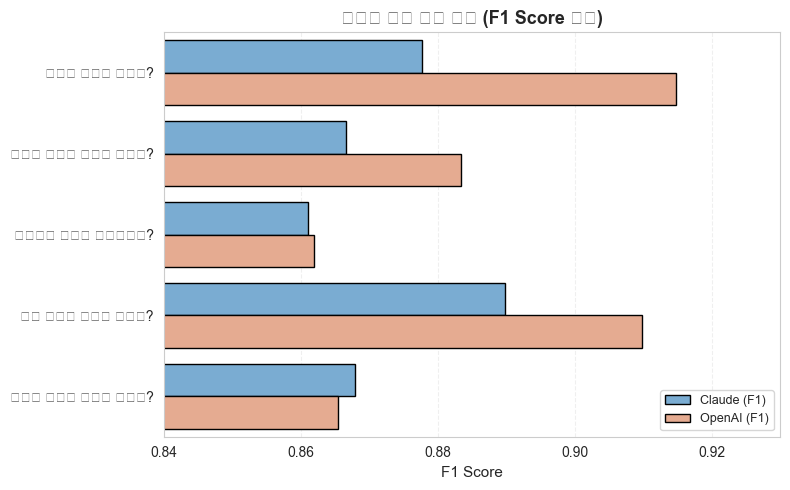

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 정의
claude_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "Claude (F1)": [0.8777, 0.8667, 0.8611, 0.8898, 0.8680]
})

openai_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "OpenAI (F1)": [0.9148, 0.8834, 0.8620, 0.9099, 0.8654]
})

# 병합 및 변형
merged = pd.merge(claude_scores, openai_scores, on="질문")
df_long = merged.melt(id_vars="질문", var_name="모델", value_name="F1 Score")

# 색상 통일: 파란색 계열(우리), 살구색 계열(OpenAI)
palette = {
    "Claude (F1)": "#6caee0",  # 파랑 계열
    "OpenAI (F1)": "#f3a683"   # 연한 살구색
}

# 시각화
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(
    data=df_long,
    x="F1 Score",
    y="질문",
    hue="모델",
    palette=palette,
    edgecolor="black"
)

plt.title("모델별 응답 품질 비교 (F1 Score 기준)", fontsize=13, weight='bold')
plt.xlabel("F1 Score", fontsize=11)
plt.ylabel("")
plt.xlim(0.84, 0.93)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title="", loc='lower right', fontsize=9)
plt.tight_layout()
plt.savefig("f1_score_matched_style.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [20]:
import matplotlib.font_manager as fm

# 명시적으로 '맑은 고딕' 경로로 설정 (Windows 기준)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()


C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3547778349.py:60: UserWarning: Glyph 55092 (\N{HANGUL SYLLABLE HYU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3547778349.py:60: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3547778349.py:60: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3547778349.py:60: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3547778349.py:60: UserWarning: Glyph 46523 (\N{HANGUL SYLLABLE DDEOH}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\KDT28\AppData\Local\Temp\ipykernel_25112\3547778349.py:60: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) Arial.
  plt.tight_l

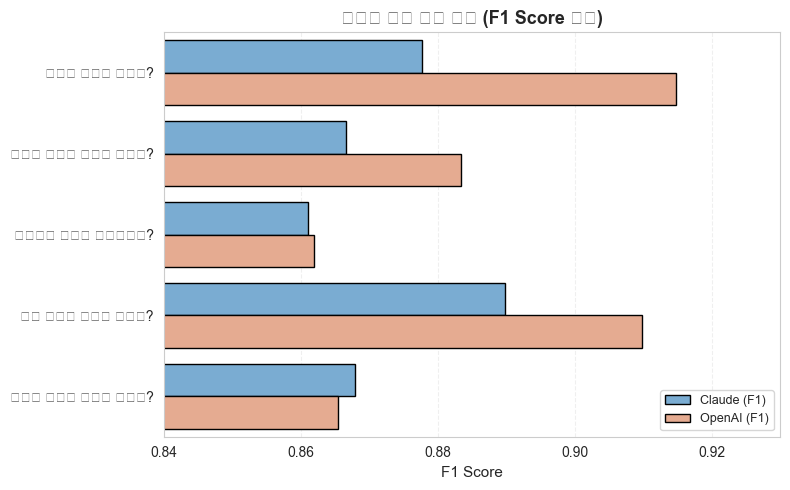

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# ===== 한글 폰트 설정 (경고 방지용) =====
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ===== 데이터 정의 =====
claude_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "Claude (F1)": [0.8777, 0.8667, 0.8611, 0.8898, 0.8680]
})

openai_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "OpenAI (F1)": [0.9148, 0.8834, 0.8620, 0.9099, 0.8654]
})

merged = pd.merge(claude_scores, openai_scores, on="질문")
df_long = merged.melt(id_vars="질문", var_name="모델", value_name="F1 Score")

palette = {
    "Claude (F1)": "#6caee0",
    "OpenAI (F1)": "#f3a683"
}

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(
    data=df_long,
    x="F1 Score",
    y="질문",
    hue="모델",
    palette=palette,
    edgecolor="black"
)

plt.title("모델별 응답 품질 비교 (F1 Score 기준)", fontsize=13, weight='bold')
plt.xlabel("F1 Score", fontsize=11)
plt.ylabel("")
plt.xlim(0.84, 0.93)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title="", loc='lower right', fontsize=9)
plt.tight_layout()
plt.savefig("f1_score_matched_style.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


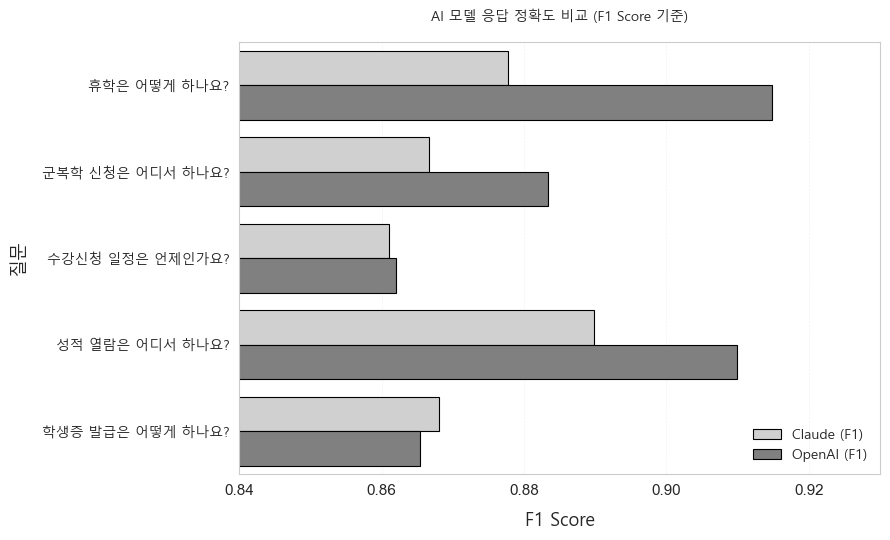

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# ===== 1. 한글 폰트 설정 =====
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ===== 2. 데이터 정의 =====
claude_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "Claude (F1)": [0.8777, 0.8667, 0.8611, 0.8898, 0.8680]
})

openai_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "OpenAI (F1)": [0.9148, 0.8834, 0.8620, 0.9099, 0.8654]
})

# ===== 3. 병합 및 변환 =====
merged = pd.merge(claude_scores, openai_scores, on="질문")
df_long = merged.melt(id_vars="질문", var_name="모델", value_name="F1 Score")

# ===== 4. 시각화 =====
sns.set_style("whitegrid")
plt.figure(figsize=(9, 5.5))

# 회색 계열 색상 팔레트 설정
custom_palette = {
    "Claude (F1)": "#D0D0D0",   # 밝은 회색
    "OpenAI (F1)": "#808080"   # 중간 회색
}

sns.barplot(
    data=df_long,
    x="F1 Score",
    y="질문",
    hue="모델",
    palette=custom_palette,
    edgecolor="black",
    linewidth=0.8
)

# ===== 5. 텍스트 및 스타일 =====
plt.title("AI 모델 응답 정확도 비교 (F1 Score 기준)", fontsize=16, fontproperties=font_prop, pad=15)
plt.xlabel("F1 Score", fontsize=13, fontproperties=font_prop, labelpad=10)
plt.ylabel("질문", fontsize=13, fontproperties=font_prop, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, fontproperties=font_prop)
plt.xlim(0.84, 0.93)

plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.25)
plt.legend(title="", prop=font_prop, fontsize=11, loc='lower right', frameon=False)
plt.tight_layout()

# ===== 6. 저장 =====
plt.savefig("f1_chart_gray_theme.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


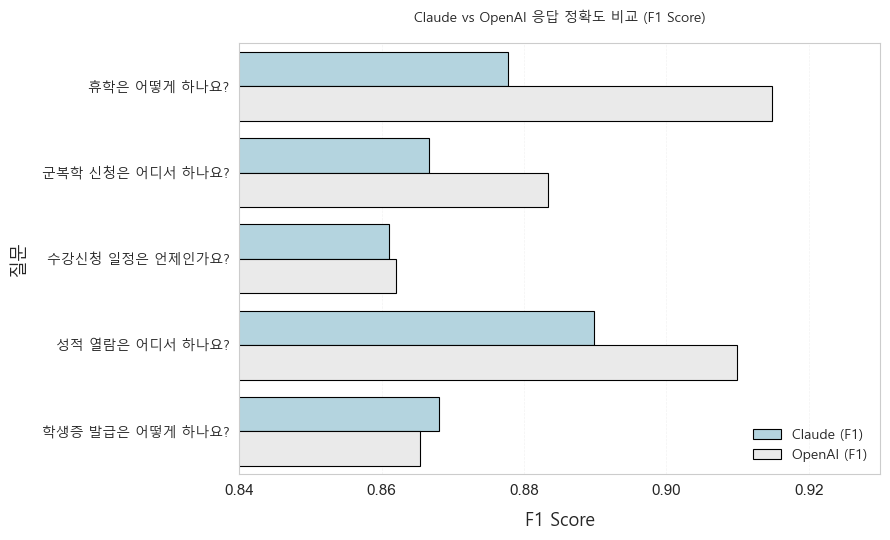

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# ===== 1. 한글 폰트 설정 =====
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ===== 2. 데이터 정의 =====
claude_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "Claude (F1)": [0.8777, 0.8667, 0.8611, 0.8898, 0.8680]
})

openai_scores = pd.DataFrame({
    "질문": [
        "휴학은 어떻게 하나요?",
        "군복학 신청은 어디서 하나요?",
        "수강신청 일정은 언제인가요?",
        "성적 열람은 어디서 하나요?",
        "학생증 발급은 어떻게 하나요?"
    ],
    "OpenAI (F1)": [0.9148, 0.8834, 0.8620, 0.9099, 0.8654]
})

# ===== 3. 병합 및 변환 =====
merged = pd.merge(claude_scores, openai_scores, on="질문")
df_long = merged.melt(id_vars="질문", var_name="모델", value_name="F1 Score")

# ===== 4. 시각화 =====
sns.set_style("whitegrid")
plt.figure(figsize=(9, 5.5))

# 연한 파랑 & 거의 흰색 회색
custom_palette = {
    "Claude (F1)": "#ADD8E6",  # Light Blue
    "OpenAI (F1)": "#EAEAEA"   # Very Light Gray
}

sns.barplot(
    data=df_long,
    x="F1 Score",
    y="질문",
    hue="모델",
    palette=custom_palette,
    edgecolor="black",
    linewidth=0.8
)

# ===== 5. 스타일 요소 =====
plt.title("Claude vs OpenAI 응답 정확도 비교 (F1 Score)", fontsize=16, fontproperties=font_prop, pad=15)
plt.xlabel("F1 Score", fontsize=13, fontproperties=font_prop, labelpad=10)
plt.ylabel("질문", fontsize=13, fontproperties=font_prop, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, fontproperties=font_prop)
plt.xlim(0.84, 0.93)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.25)
plt.legend(title="", prop=font_prop, fontsize=11, loc='lower right', frameon=False)
plt.tight_layout()

# ===== 6. 저장 =====
plt.savefig("f1_chart_blue_gray.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()
